<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-1/blob/master/CAP5610_HW1Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Using Sigmoid Activation and Mean Squared Error Loss


In [0]:


import numpy as np
import sklearn
from keras.datasets import mnist

#Load data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()


In [0]:
#Use one-hot encoding
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
#Preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


#Prepare data for binary classifiers
#Have all positive examples = 1, negative examples = 0
binary_labels = []
binary_test_labels = []

#Training labels
for i in range(10):
  temp = []
  for j in range(len(train_labels_original)):
    if train_labels_original[j] == i:
      temp.append(1)
    else:
      temp.append(0)
      
  binary_labels.append(temp)
 
#Test Labels
for i in range(10):
  temp = []
  for j in range(len(test_labels_original)):
    if test_labels_original[j] == i:
      temp.append(1)
    else:
      temp.append(0)
      
  binary_test_labels.append(temp)
  




In [0]:
#Some functions

#Sigmoid
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


#Derivative of sigmoid function
def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

#Vectorized gradient function (a-y)*a'*X
def gradient(w, b, x, y):
  activation = sigmoid(np.dot(x, w) + b)
  a_prime = sigmoid_derivative(np.dot(x, w) + b)
  
  return np.dot(np.transpose(x), np.multiply(np.transpose(activation-y), a_prime))


#Calculate vectorized loss using L2 norm of predictions-labels
def mse(w, b, x, y):
  predictions = sigmoid(np.dot(x, w) + b)
  length = len(y)
  
  loss = np.square(np.linalg.norm((predictions-y), ord=2)) / length
              
  return loss

def bias_gradient(w, b, x, y):
  #Gradient for bias using mse loss
  length = len(y)
  activation = sigmoid(np.dot(x, w) + b)
  a_prime = sigmoid_derivative(np.dot(x, w) + b)
  
  return np.square(np.linalg.norm(np.multiply(np.transpose(activation-y), a_prime), ord = 2)) / length
  
  


In [0]:
import random

#Initialize weight matrix (for 10 classifiers)
weights = []
bias = []
for i in range(10):
  weights.append([])
  bias.append(random.random()-0.5)
  for j in range(784):
    weights[i].append(random.random()-0.5)
    




In [70]:
#Training

#Hyperparameters
epochs = 12
batch_size = 1000
learning_rate = 0.001

training_loss_history = []
test_loss_history = []



#Train each binary classifier
for k in range(10):
  print('training', k, 'classifier')
  batch_count = []
  test_loss = []
  training_loss = []
  
  
  #Iterate over epochs
  for i in range(epochs):
    #Iterate over mini batches
    for j in range(int(len(train_images)/batch_size)):

      #get mini batch
      data = train_images[batch_size*j:min(len(train_images), batch_size*(j+1))]
      labels = binary_labels[k][batch_size*j:min(len(train_images), batch_size*(j+1))]

      #adjust weights and biases
      weights[k] = weights[k] - learning_rate * gradient(weights[k], bias[k], data, labels)
      bias[k] = bias[k] - learning_rate * bias_gradient(weights[k], bias[k], data, labels)


    #Calculate loss after each epoch
    training_loss.append(mse(weights[k], bias[k], train_images, binary_labels[k]))
    test_loss.append(mse(weights[k], bias[k], test_images, binary_test_labels[k]))

    batch_count.append(i)
    print("Epoch", i, 'Training loss:', training_loss[i], 'Test Loss', test_loss[i])
   
  #Add loss for each binary clasifier to history
  training_loss_history.append(training_loss)
  test_loss_history.append(test_loss)
  
  

training 0 classifier
Epoch 0 Training loss: 0.034433214101978984 Test Loss 0.03366994171207984
Epoch 1 Training loss: 0.02516184952325465 Test Loss 0.0239233988560806
Epoch 2 Training loss: 0.021187648064386576 Test Loss 0.019624791094358367
Epoch 3 Training loss: 0.0187673127627904 Test Loss 0.016966631696480276
Epoch 4 Training loss: 0.017095649815432466 Test Loss 0.015140903153656439
Epoch 5 Training loss: 0.015868078849900144 Test Loss 0.013831515755840221
Epoch 6 Training loss: 0.01492710073099706 Test Loss 0.012859332860424587
Epoch 7 Training loss: 0.014180057720450417 Test Loss 0.012114780745803657
Epoch 8 Training loss: 0.013569892964206659 Test Loss 0.011528572289896538
Epoch 9 Training loss: 0.013060337454964419 Test Loss 0.011055736284063679
Epoch 10 Training loss: 0.012627416102011162 Test Loss 0.010666323539345214
Epoch 11 Training loss: 0.012254571232996243 Test Loss 0.010339846400104975
training 1 classifier
Epoch 0 Training loss: 0.024565820602245002 Test Loss 0.02212

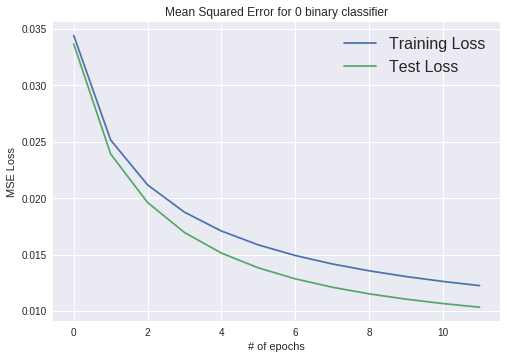

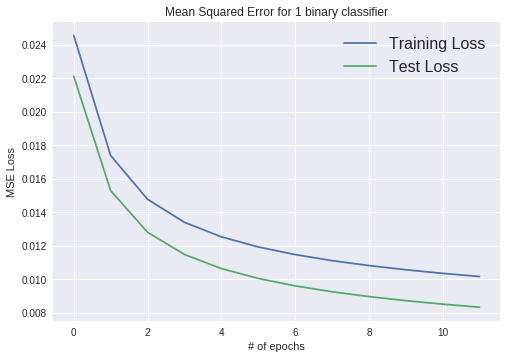

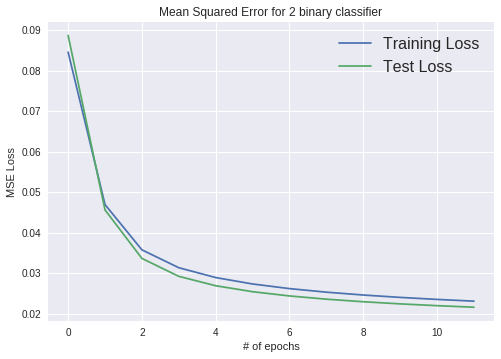

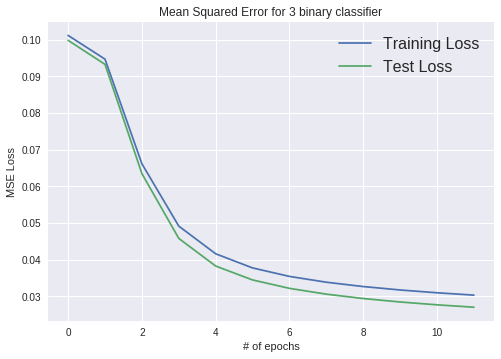

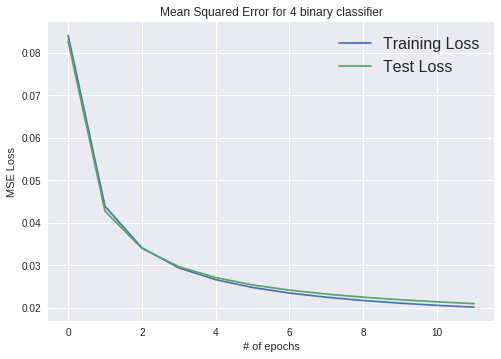

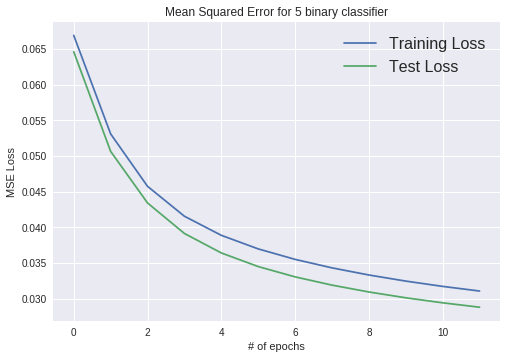

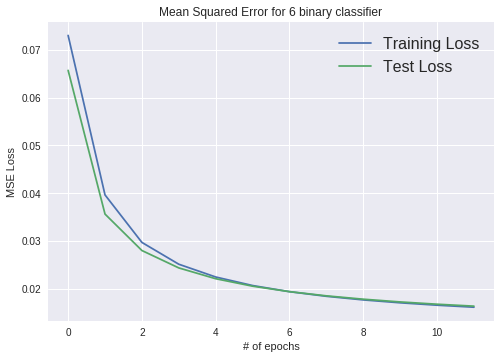

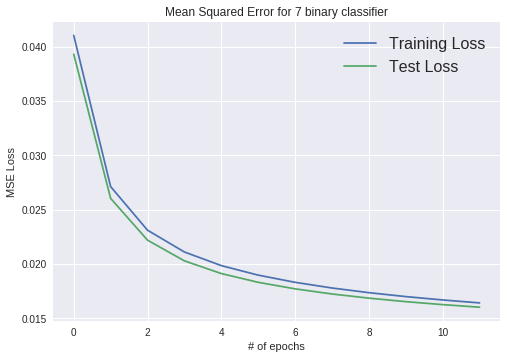

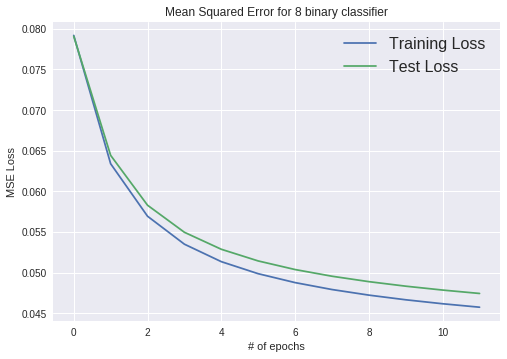

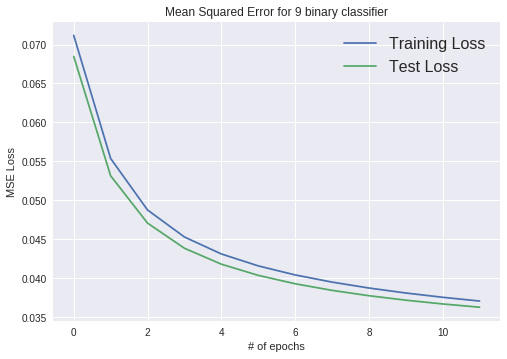

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt


for i in range(10):
  
  plt.plot(batch_count, training_loss_history[i], label = "Training Loss")
  plt.plot(batch_count, test_loss_history[i], label = "Test Loss")
  plt.legend(loc="upper right", fontsize=16)
  plt.xlabel("# of epochs")
  plt.ylabel("MSE Loss")
  plt.title("Mean Squared Error for %i binary classifier" % i)
  plt.show()
